<a href="https://colab.research.google.com/github/boskidisanalysis/Milk_Quality/blob/main/milk_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milk Quality 
Using the [Milk quality prediction dataset from Kaggle](https://www.kaggle.com/datasets/cpluzshrijayan/milkquality) we try to predict the grade of the milk in production. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.rename(columns={'Temprature':'Temperature'},inplace=True)

In [6]:
df.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
X = df.drop('Grade', axis=1)
y = df.Grade

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
import xgboost as xgb

In [ ]:
data = xgb.DMatrix(x_train, label=y_train)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(max_depth=3)
clf.fit(x_train,y_train)

xgb_pred_test = clf.predict(x_test)
xgb_pred_train = clf.predict(x_train)

In [ ]:
clf.score(x_test,y_test)

0.9905660377358491

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, xgb_pred_test)

0.9905660377358491

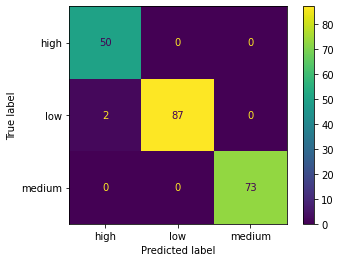

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, xgb_pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot()

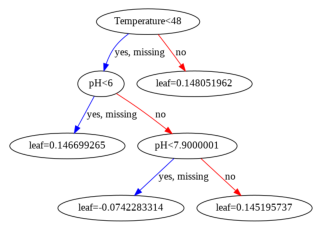

In [ ]:
ax = xgb.plot_tree(clf, num_trees=1)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.6 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf)

In [ ]:
shap_values = explainer.shap_values(x_train,y_train)

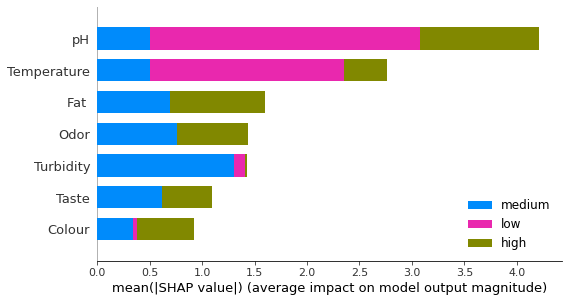

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_train,class_names = le.classes_)

In [ ]:
shap.initjs()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], x_train.iloc[0,:])

In [ ]:
X.columns

Index(['pH', 'Temperature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'], dtype='object')

In [ ]:
sample = pd.DataFrame([[4, 50,1,0,1,1,255]], columns=X.columns)

In [ ]:
shap_values = explainer.shap_values(sample)

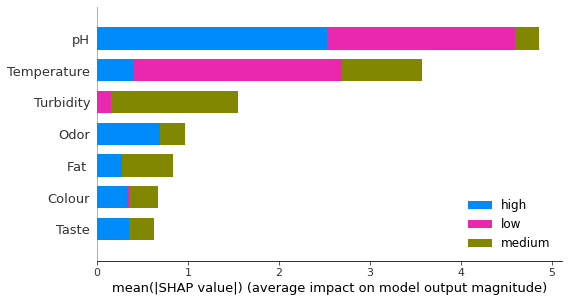

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values,sample, class_names = le.classes_)

In [ ]:
le.inverse_transform(list(clf.predict(sample)))[0]

'low'

#APP

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def predict(*args):
  sample= pd.DataFrame([args], columns= X.columns)
  prediction = le.inverse_transform(list(clf.predict(sample)))
  return prediction[0]

In [ ]:
def explain(*args):
  sample = pd.DataFrame([args], columns= X.columns)
  explainer = shap.TreeExplainer(clf)
  shap_values = explainer.shap_values(sample)
  fig_m = plt.figure()
  shap.summary_plot(shap_values,sample, class_names = le.classes_)
  return fig_m

In [ ]:
predict(4, 50,1,0,1,1,255)

'low'

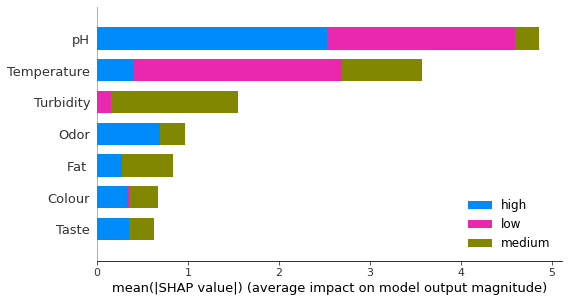

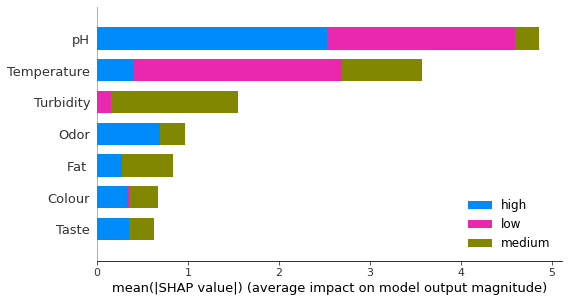

In [ ]:
explain(4, 50,1,0,1,1,255)

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 7.7 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 212 kB 39.0 MB/s 
     |████████████████████████████████| 270 kB 49.9 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 55.8 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 2.3 MB 45.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.1 MB 51.7 MB/s 
     |████████████████████████████████| 856 kB 69.

In [ ]:
import gradio as gr

In [ ]:
X.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df.sample()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
47,6.8,45,1,1,1,0,245,high


In [ ]:
X.Turbidity.unique()

array([0, 1])

In [ ]:
binary = [0,1]

In [ ]:
import random

In [ ]:
from pydantic.types import T
with gr.Blocks() as demo:
    gr.Markdown('''
    **Milk Classification with XGBoost 💰**:  This demo using an XGBoost classifier predicts milk quality based on 7 independent variables, along with Shapley value-based *explanations*. 
    ''')
    with gr.Row():
        with gr.Column():
          pH = gr.Slider(label="pH", minimum=0, maximum=14, step=0.1, randomize=True)
          Temperature = gr.Number(label='Temperature in F',
                value=45,
            )
          Taste = gr.Dropdown(
                label="Taste",
                choices=binary,
                value=lambda: random.choice(binary),
            )
          Odor = gr.Dropdown(
                label="Odor",
                choices=binary,
                value=lambda: random.choice(binary),
            )
          Fat = gr.Dropdown(
                label="Fat",
                choices=binary,
                value=lambda: random.choice(binary),
            )
          Turbidity = gr.Dropdown(
                label="Turbidity",
                choices=binary,
                value=lambda: random.choice(binary),
            )
          Colour = gr.Number(label='Colour',
                value=250,
            )
        with gr.Column():
            label = gr.Label()
            plot = gr.Plot()
            with gr.Row():
                predict_btn = gr.Button(value="Predict")
                interpret_btn = gr.Button(value="Explain")
            predict_btn.click(
                predict,
                inputs=[
                    pH,
                    Temperature,
                    Taste,
                    Odor,
                    Fat,
                    Turbidity,
                    Colour,
                ],
                outputs=[label],
            )
            interpret_btn.click(
                explain,
                inputs=[
                    pH,
                    Temperature,
                    Taste,
                    Odor,
                    Fat,
                    Turbidity,
                    Colour,
                ],
                outputs=[plot],
            )

In [24]:
demo.launch(share=True)

NameError: ignored

# EDA

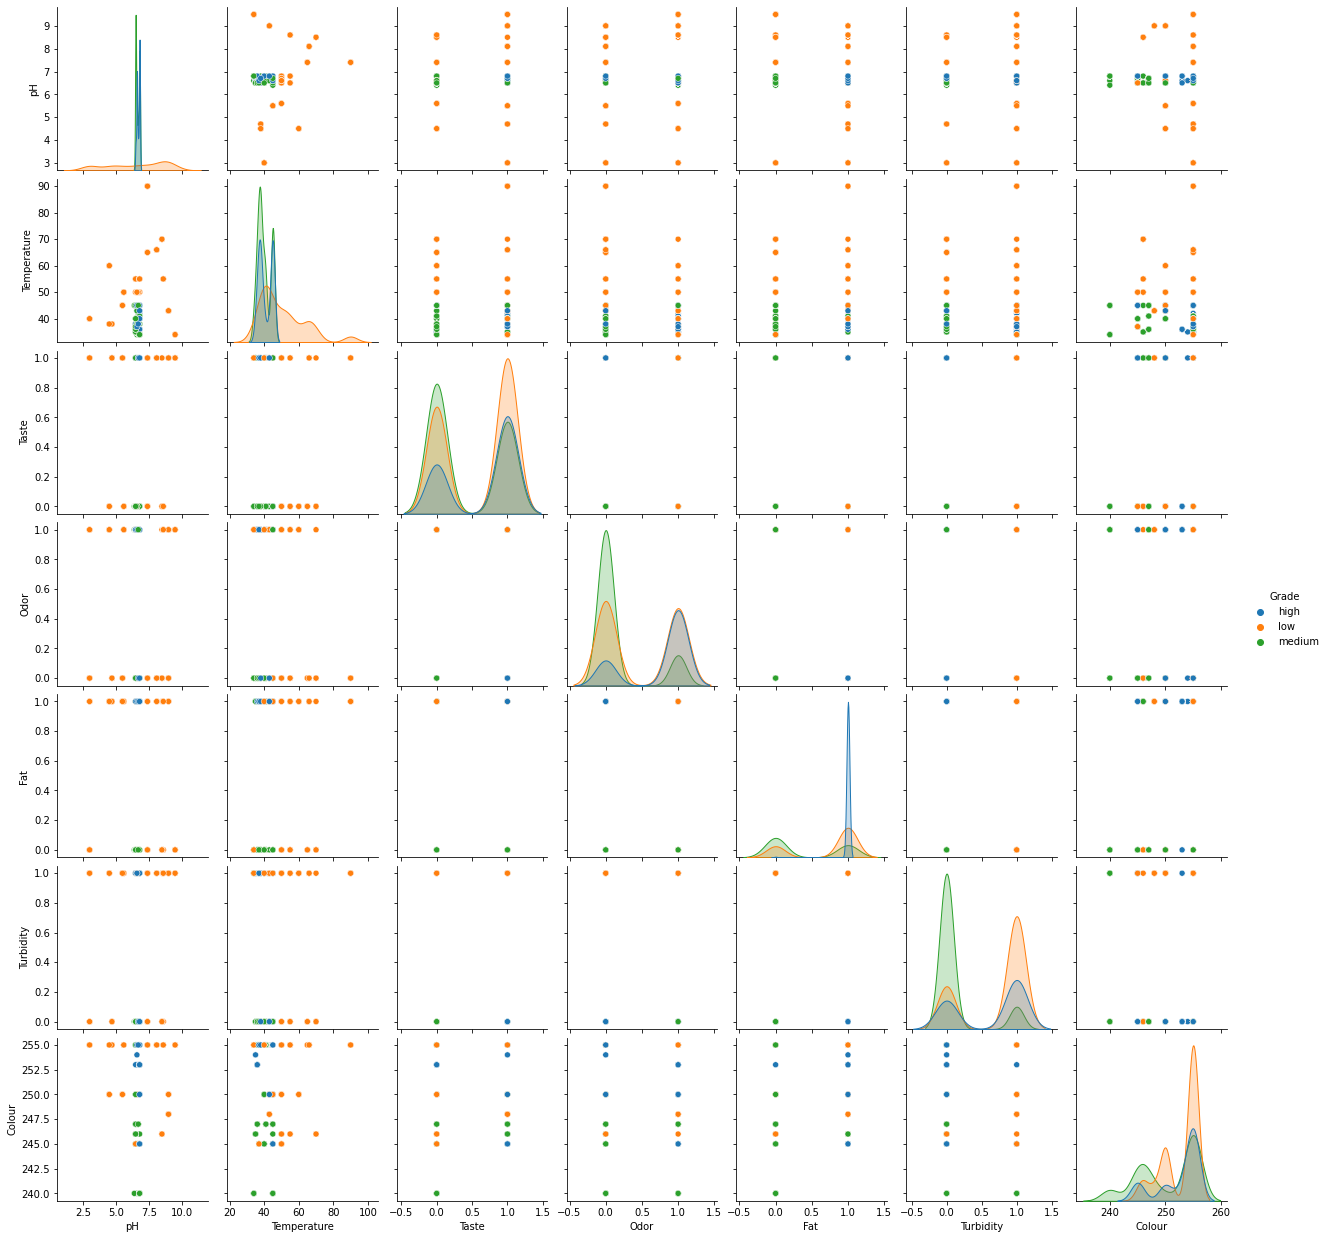

In [14]:
sns.pairplot(df, hue= 'Grade')

In [12]:
df.Grade.head()

0      high
1      high
2       low
3       low
4    medium
Name: Grade, dtype: object

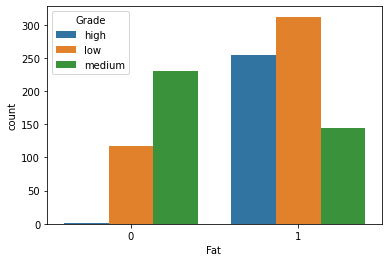

In [23]:
sns.countplot(data=df,x='Fat ', hue='Grade')